# Task #4 : Creating the Decision Tree classifier and visualizing it graphically

## Decision Tree Algorithm

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

In [1]:
# Importing libraries in Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [2]:
#Loading the iris dataset
df=pd.read_csv(r"C:\Users\Rahul\Downloads\iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


###  Visualising the Decision Tree to understand it better.


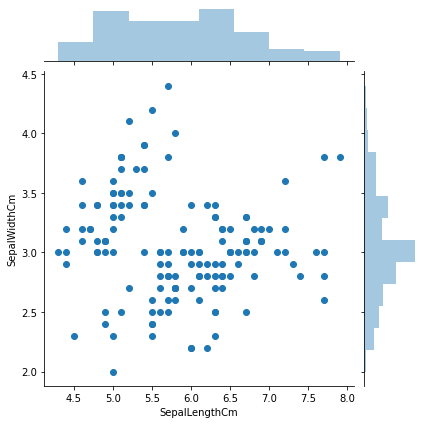

In [4]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df)


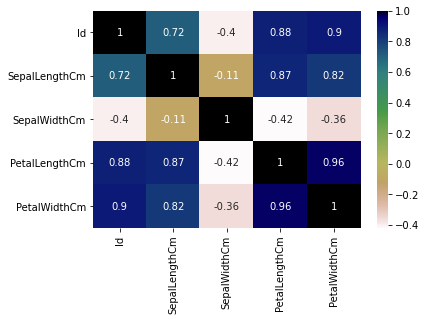

In [5]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='gist_earth_r', annot=True)
plt.show()

In [6]:
# Dropping the id and Species section
df_new=df.drop(['Species','Id'],axis=1)
df_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y=df["Species"]
X=df_new


In [8]:

# Split Train and Test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
72,6.3,2.5,4.9,1.5
98,5.1,2.5,3.0,1.1
124,6.7,3.3,5.7,2.1
68,6.2,2.2,4.5,1.5
83,6.0,2.7,5.1,1.6
...,...,...,...,...
11,4.8,3.4,1.6,0.2
141,6.9,3.1,5.1,2.3
130,7.4,2.8,6.1,1.9
114,5.8,2.8,5.1,2.4


In [10]:
y_train


72     Iris-versicolor
98     Iris-versicolor
124     Iris-virginica
68     Iris-versicolor
83     Iris-versicolor
            ...       
11         Iris-setosa
141     Iris-virginica
130     Iris-virginica
114     Iris-virginica
8          Iris-setosa
Name: Species, Length: 120, dtype: object

In [11]:

# Train and Test data
tree_new=DecisionTreeClassifier(criterion='entropy')
tree_new.fit(X_train, y_train)
y_pred=tree_new.predict(X_test)

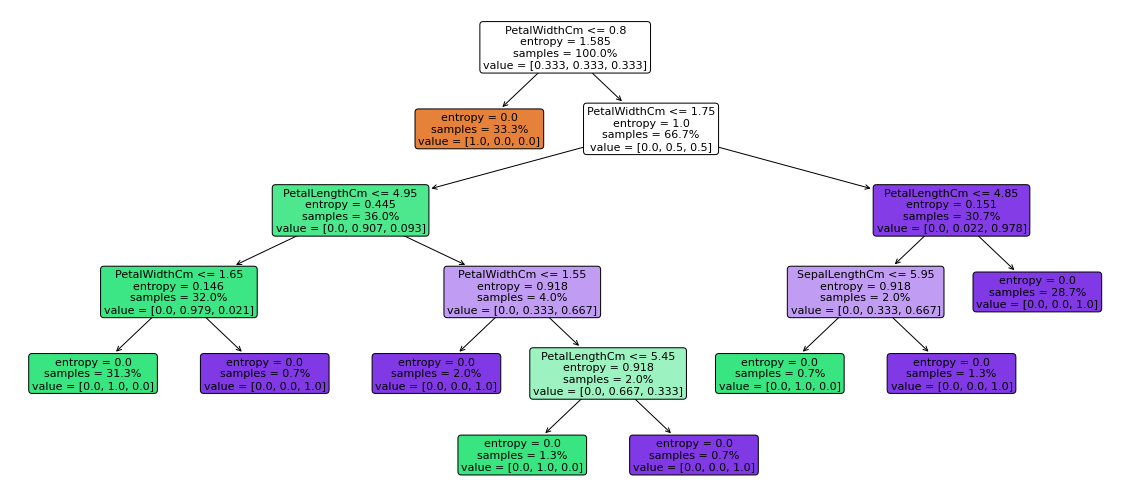

In [12]:
dtree=list(df_new.columns.values)
dtree
plt.figure(figsize=(20,9))
tree.plot_tree(tree_new.fit(X,y), feature_names=dtree, filled=True, precision=3, proportion=True,rounded=True)
plt.show()

## Evaluating the model


In [20]:
print('Accuracy is', round(accuracy_score(y_pred, y_test)*100, 2),'\n')
print(classification_report(y_pred, y_test))

Accuracy is 93.33 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.86      0.86      0.86         7

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

